In [6]:
import sys
sys.path.append('/home/jovyan/home')
from Basics import *
setplot(dark=True)

from illstack_CAMELS.CAMELS_example import profiles_expand_new

python setup.py build_ext --inplace

# Test L50

In [ ]:
# 88 halos:
{1: [4.42],
2: [2.48, 2.30],
3: [2.29, 2.24],
4: [2.96, 2.95],
5: [4.59]}

# More:
{1: [],
2: [],
3: [],
4: [],
5: []}

In [299]:
file25t = h5py.File(f"/home/jovyan/home/Profiles/IllustrisTNG/1P/IllustrisTNG_1P_p1_n2_74.hdf5", 'r')
params25t, profs25t, props25t = extract(file25t['Parameters']), extract(file25t['Profiles']), extract(file25t['Groups'])
file25t.close()
props25t, profs25t = profiles_expand_new.convert(props25t, params25t['Redshift'], params25t['HubbleParam'], profs=profs25t)

In [12]:
def profplotsetup(axs):
    for ax in axs.flatten():

        cax = inset_axes(ax, width="40%", height="5%", loc="lower left", borderpad=2)
        cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=lognorm, cmap=cmap), cax=cax, orientation='horizontal',
                           ticks=10**np.array([11, 12, 13, 14]))
        cbar.ax.set_xticklabels([f"{m}" for m in [11, 12, 13, 14]], fontsize=10)
        cax.set_title(r'$\log (M_{200c} / M_\odot) $', fontsize=15, pad=10)


        ax.set(xscale='log', yscale='log')
        ax.tick_params(top=False, right=False, which='both')

        ax2x = ax.secondary_xaxis('top', functions=(lambda rmpc: rmpc*1e3*(1+params50['Redshift'])*params50['HubbleParam'],
                                                    lambda rckpch: rckpch/1e3/(1+params50['Redshift'])/params50['HubbleParam']))
        ax.set_xlabel(r'$r$ [Mpc]'); ax2x.set_xlabel(xlabel=r'$r$ [ckpc/$h$]', size=20)

        ax2y = ax.secondary_yaxis('right', functions=(lambda Pthmpc: Pthmpc*(u.Msun/u.Mpc/u.s**2).to(u.dyne/u.cm**2),
                                                    lambda Pthcgs: Pthcgs*(u.dyne/u.cm**2).to(u.Msun/u.Mpc/u.s**2)))
        ax.set_ylabel(r'$P_\text{th} \ [\frac{M_\odot}{\text{Mpc} \ s^2}$]')
        ax2y.set_ylabel(ylabel=r'$P_\text{th}$ [dyne/cm$^2$]', size=20)

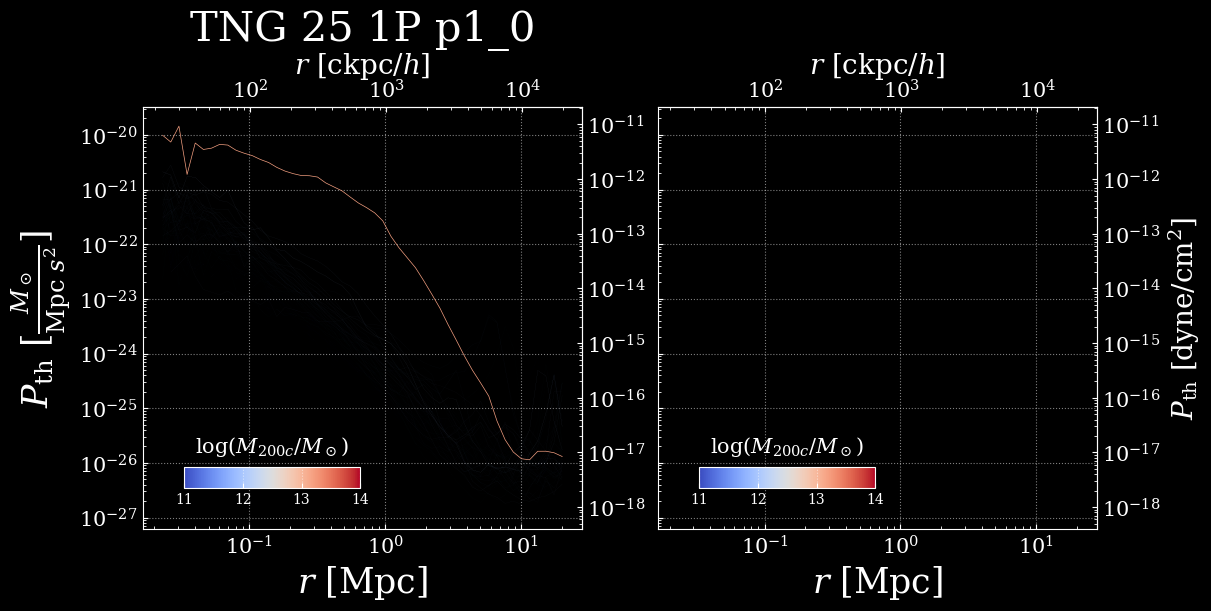

In [287]:
fig, axs  = plt.subplots(1, 2, figsize=(12, 6), layout='constrained', sharex=True, sharey=True)

profplotsetup(axs)

axs[0].set(title=f'TNG 25 {subset} {sim}')
for i in range(profs25t['npart'].shape[0]):
    axs[0].loglog(profs25t['r'][i][profs25t['npart'][i]!=0], profs25t['gaspth'][i][profs25t['npart'][i]!=0], 
            c = cmap(lognorm(props25t['Group_M_Crit200'][i])), zorder=props25t['Group_M_Crit200'][i], lw = norm(props25t['Group_M_Crit200'][i]))

plt.show()

In [8]:
suite = 'TNG_L50'
subset = '1P'
sim = 'p1_0'
snap = 74

extract = lambda group: {key: group[key][()] for key in group.keys()}

file50 = h5py.File(f"/home/jovyan/home/Profiles/{suite}/{subset}/{suite}_{subset}_{sim}_{snap}.hdf5", 'r')
params50, profs50, props50 = extract(file50['Parameters']), extract(file50['Profiles']), extract(file50['Groups'])
file50.close()
props50, profs50 = profiles_expand_new.convert(props50, params50['Redshift'], params50['HubbleParam'], profs=profs50)

# [(key, params[key][()]) for key in params.keys()]
# [(key, props[key].shape) for key in props.keys()]
print([(key, profs50[key].shape) for key in profs50.keys()])


file25 = h5py.File(f"/home/jovyan/home/Profiles/IllustrisTNG/{subset}/IllustrisTNG_{subset}_{sim}_{snap}.hdf5", 'r')
params25, profs25, props25 = extract(file25['Parameters']), extract(file25['Profiles']), extract(file25['Groups'])
file25.close()
props25, profs25 = profiles_expand_new.convert(props25, params25['Redshift'], params25['HubbleParam'], profs=profs25)

# [(key, params[key][()]) for key in params.keys()]
# [(key, props[key].shape) for key in props.keys()]
print([(key, profs25[key].shape) for key in profs25.keys()])

[('r', (4259, 50)), ('npart', (4259, 50)), ('gasdens', (4259, 50)), ('gaspth', (4259, 50))]
[('r', (622, 50)), ('npart', (622, 50)), ('gasdens', (622, 50)), ('gaspth', (622, 50))]


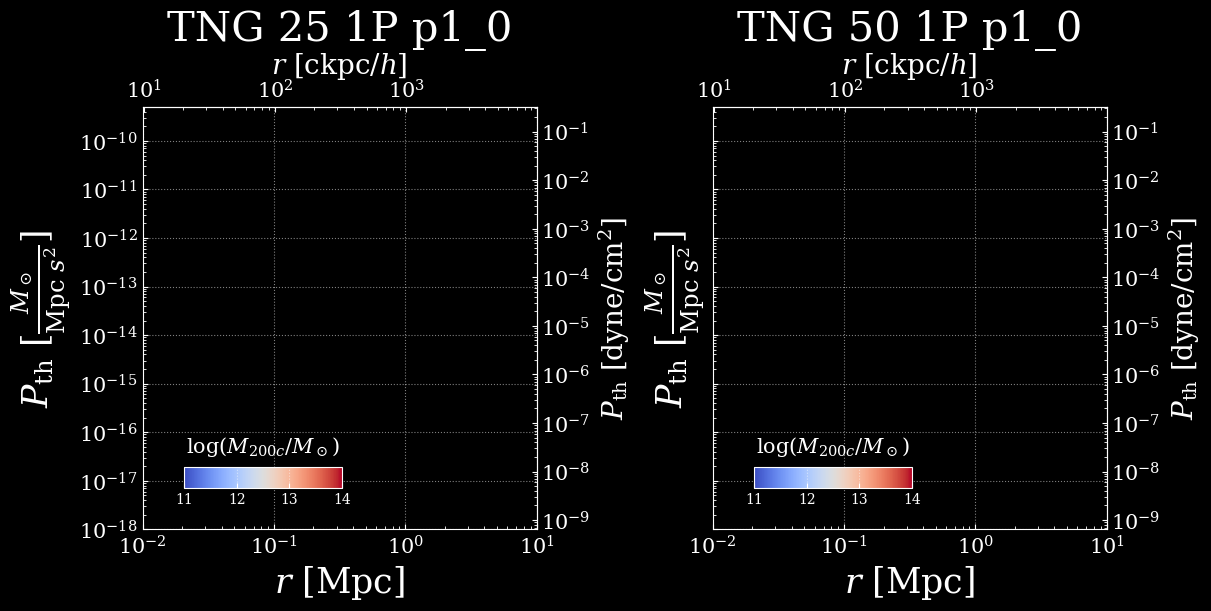

In [15]:
fig, axs  = plt.subplots(1, 2, figsize=(12, 6), layout='constrained', sharey=True, sharex=True)


cmap = plt.get_cmap('coolwarm')
lognorm = mpl.colors.LogNorm(vmin=10**11, vmax=10**14)
norm = mpl.colors.Normalize(vmin=10**11, vmax=10**13.5)

profplotsetup(axs)



axs[0].set(xlim=(1e-2, 1e1), ylim=(1e-18, 5e-10), title=f'TNG 25 {subset} {sim}')
for i in range(profs25['npart'].shape[0]):
    axs[0].loglog(profs25['r'][i][profs25['npart'][i]!=0], profs25['gaspth'][i][profs25['npart'][i]!=0], 
            c = cmap(lognorm(props25['Group_M_Crit200'][i])), zorder=props25['Group_M_Crit200'][i], lw = norm(props25['Group_M_Crit200'][i]))

axs[1].set(title=f'TNG 50 {subset} {sim}')
for i in range(profs50['npart'].shape[0]):
    axs[1].loglog(profs50['r'][i][profs50['npart'][i]!=0], profs50['gaspth'][i][profs50['npart'][i]!=0], 
            c = cmap(lognorm(props50['Group_M_Crit200'][i])), zorder=props50['Group_M_Crit200'][i], lw = norm(props50['Group_M_Crit200'][i]))

plt.show()

In [551]:
file50 = h5py.File(f"/home/jovyan/home/Profiles/{suite}/{subset}/{suite}_{subset}_{sim}_{snap}.hdf5", 'r')
print(file50.keys())
params50, profs50, props50 = extract(file50['Parameters']), extract(file50['Profiles']), extract(file50['Groups'])
file50.close()

<KeysViewHDF5 ['Groups', 'Parameters', 'Profiles']>


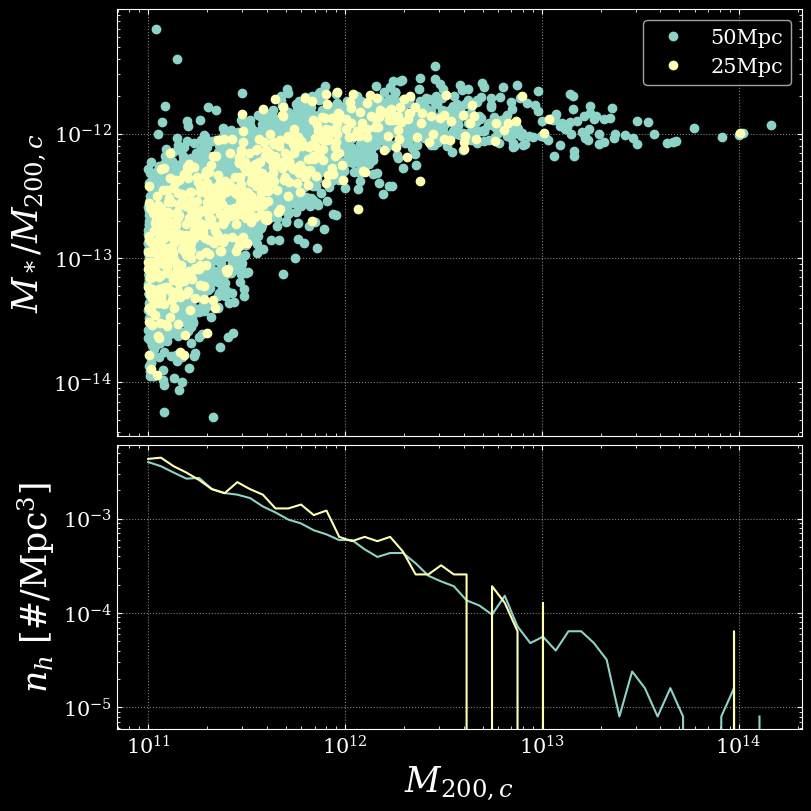

In [3]:
fig, axs  = plt.subplots(2, 1, figsize=(8, 8), layout='constrained', sharex=True, gridspec_kw={'height_ratios': [3, 2]})
axs[0].set(ylabel=r'$M_*/M_{200, c}$')
axs[1].set(xlabel=r'$M_{200, c}$', ylabel=r'$n_h \ [\#/\text{Mpc}^3]$')

axs[0].loglog(props50['Group_M_Crit200'], props50['GroupMassType'][:,4]/props50['Group_M_Crit200'], ls='', marker='o', label='50Mpc')
axs[0].loglog(props25['Group_M_Crit200'], props25['GroupMassType'][:,4]/props25['Group_M_Crit200'], ls='', marker='o', label='25Mpc')

counts, bins = np.histogram(props50['Group_M_Crit200'], bins=np.logspace(11, 14.17, 50))
axs[1].plot(bins[:-1], counts/50**3)
counts, bins = np.histogram(props25['Group_M_Crit200'], bins=np.logspace(11, 14.17, 50))
axs[1].plot(bins[:-1], counts/25**3)

axs[1].set(yscale='log')
axs[0].legend(); plt.show()

In [145]:
def profplotsetup(axs):
    for ax in axs.flatten():
        ax.set(xscale='log', yscale='log')
        cax = inset_axes(ax, width="40%", height="5%", loc="lower left", borderpad=2)
        cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=lognorm, cmap=cmap), cax=cax, orientation='horizontal',
                           ticks=10**np.array([11, 12, 13, 14]))
        cbar.ax.set_xticklabels([f"{m}" for m in [11, 12, 13, 14]], fontsize=10)
        cax.set_title(r'$\log (M_{200c} / M_\odot) $', fontsize=15, pad=10)

        ax.tick_params(top=False, which='both')

        ax2x = ax.secondary_xaxis('top', functions=(lambda rmpc: rmpc*1e3*(1+params50['Redshift'])*params50['HubbleParam'],
                                                    lambda rckpch: rckpch/1e3/(1+params50['Redshift'])/params50['HubbleParam']))
        ax.set_xlabel(r'$r$ [Mpc]'); ax2x.set_xlabel(xlabel=r'$r$ [ckpc/$h$]', size=20)

In [191]:
np.sum((profs50['npart'][:, 0]==0) & (profs50['npart'][:, 1]==0) & (profs50['npart'][:, 2]==0) & (profs50['npart'][:, 3]==0)
      & (profs50['npart'][:, 4]==0)& (profs50['npart'][:, 5]==0))

4

In [193]:
file50 = h5py.File(f"/home/jovyan/home/Profiles/{suite}/{subset}/{suite}_{subset}_{sim}_{snap}.hdf5", 'r')
params50, profs50, props50 = extract(file50['Parameters']), extract(file50['Profiles']), extract(file50['Groups'])
file50.close()

0.009463524391606038


(array([ 18.,  39.,  90., 112., 137., 159., 191., 188., 190., 164., 156.,
        165., 138., 134., 139., 115., 131.,  83.,  70.,  98.,  81.,  60.,
         78.,  65.,  67.,  52.,  46.,  61.,  52.,  50.,  43.,  50.,  42.,
         51.,  37.,  35.,  37.,  29.,  69.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39.]),
 <BarContainer object of 39 artists>)

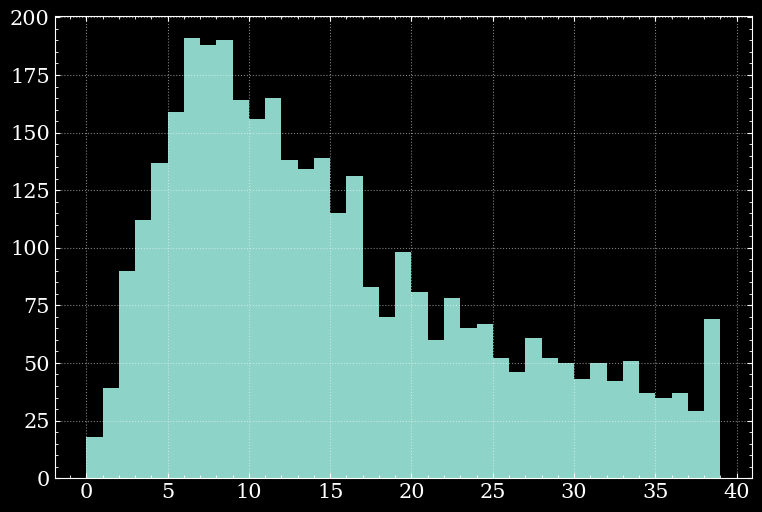

In [195]:
print(profs50['r'][0, 5]/1e3/(1+0.54)/0.6711)
plt.hist(profs50['npart'][:, 5], bins=np.arange(40))

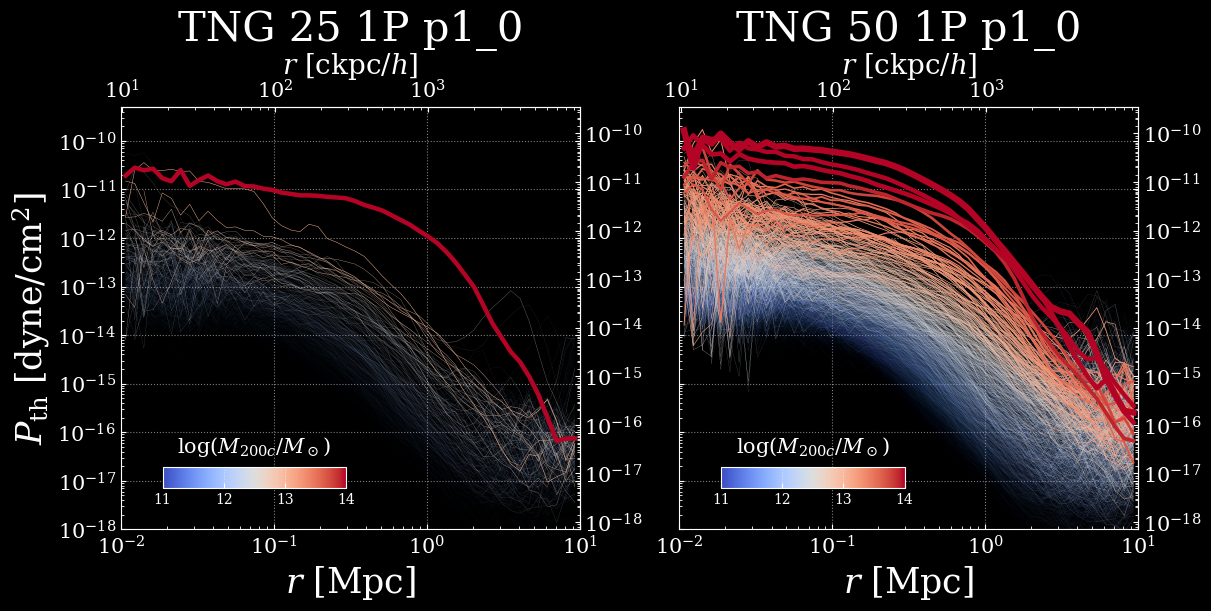

In [146]:
fig, axs  = plt.subplots(1, 2, figsize=(12, 6), layout='constrained', sharey=True, sharex=True)

cmap, lognorm, norm = plt.get_cmap('coolwarm'), mpl.colors.LogNorm(vmin=10**11, vmax=10**14), mpl.colors.Normalize(vmin=10**11, vmax=10**13.5)

profplotsetup(axs)

axs[0].set(xlim=(1e-2, 1e1), ylim=(1e-18, 5e-10), ylabel=r'$P_\text{th}$ [dyne/cm$^2$]', xlabel=r'$r$ [Mpc]', title=f'TNG 25 {subset} {sim}')
for i in range(profs25['npart'].shape[0]):
    axs[0].loglog(profs25['r'][i][profs25['npart'][i]!=0], profs25['gaspth'][i][profs25['npart'][i]!=0]*(u.Msun/u.Mpc/u.s**2).to(u.dyne/u.cm**2), 
            c = cmap(lognorm(props25['Group_M_Crit200'][i])), zorder=props25['Group_M_Crit200'][i], lw = norm(props25['Group_M_Crit200'][i]))

axs[1].set(xlabel=r'$r$ [Mpc]', title=f'TNG 50 {subset} {sim}')
for i in range(profs50['npart'].shape[0]):
    axs[1].loglog(profs50['r'][i][profs50['npart'][i]!=0], profs50['gaspth'][i][profs50['npart'][i]!=0]*(u.Msun/u.Mpc/u.s**2).to(u.dyne/u.cm**2), 
            c = cmap(lognorm(props50['Group_M_Crit200'][i])), zorder=props50['Group_M_Crit200'][i], lw = norm(props50['Group_M_Crit200'][i]))

plt.show()

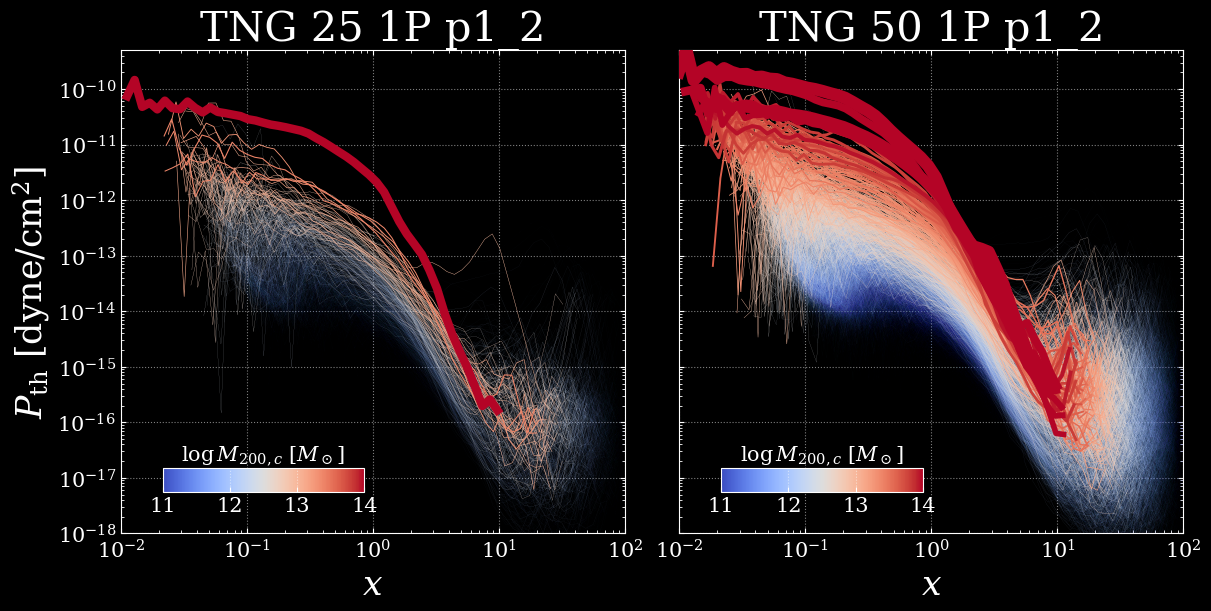

In [150]:
fig, axs  = plt.subplots(1, 2, figsize=(12, 6), layout='constrained', sharey=True, sharex=True)

cmap, lognorm, norm = plt.get_cmap('coolwarm'), mpl.colors.LogNorm(vmin=10**11, vmax=10**14), mpl.colors.Normalize(vmin=10**11, vmax=10**13.5)

profplotsetup(axs)

axs[0].set(xlim=(1e-2, 1e2), ylim=(1e-18, 5e-10), ylabel=r'$P_\text{th}$ [dyne/cm$^2$]', xlabel=r'$x$', title=f'TNG 25 {subset} {sim}')
for i in range(profs25['npart'].shape[0]):
    axs[0].loglog(profs25['r'][i][profs25['npart'][i]!=0]/props25['Group_R_Crit200'][i], profs25['gaspth'][i][profs25['npart'][i]!=0]*(u.Msun/u.Mpc/u.s**2).to(u.dyne/u.cm**2), 
            c = cmap(lognorm(props25['Group_M_Crit200'][i])), zorder=props25['Group_M_Crit200'][i], lw = norm(props25['Group_M_Crit200'][i]))

axs[1].set(xlabel=r'$x$', title=f'TNG 50 {subset} {sim}')
for i in range(profs50['npart'].shape[0]):
    axs[1].loglog(profs50['r'][i][profs50['npart'][i]!=0]/props50['Group_R_Crit200'][i], profs50['gaspth'][i][profs50['npart'][i]!=0]*(u.Msun/u.Mpc/u.s**2).to(u.dyne/u.cm**2), 
            c = cmap(lognorm(props50['Group_M_Crit200'][i])), zorder=props50['Group_M_Crit200'][i], lw = norm(props50['Group_M_Crit200'][i]))

plt.show()

In [25]:
props50['GroupMassType'][:,4].shape, props50['Group_M_Crit200'].shape

((4259,), (4259,))

In [31]:
props25['GroupMassType'][:,4]

array([2.75323868e-01, 8.86036828e-02, 9.81610268e-02, 6.19571209e-02,
       3.24251056e-02, 5.61251640e+00, 2.84717113e-01, 1.07261813e+00,
       3.15867394e-01, 2.83499241e-01, 4.86559808e-01, 8.32658648e-01,
       8.32075104e-02, 1.38376519e-01, 8.28424916e-02, 9.76715758e-02,
       8.95850882e-02, 3.38435471e-02, 3.05420738e-02, 1.04815541e-02,
       9.02794208e-03, 1.05608655e-02, 1.36689236e-02, 1.04750060e-02,
       1.21871894e-02, 3.85886455e+00, 3.04900694e+00, 3.10127401e+00,
       6.84221804e-01, 1.22400868e+00, 4.96049672e-01, 3.11912626e-01,
       1.08059287e-01, 6.23787269e-02, 3.96246240e-02, 3.84183116e-02,
       2.01335400e-01, 2.65385937e-02, 5.18355705e-02, 8.93119350e-03,
       6.83951080e-02, 1.63422637e-02, 7.15753734e-02, 1.30930422e-02,
       3.71366702e-02, 3.61930882e-03, 2.08505206e-02, 1.78778283e-02,
       2.20521484e-02, 1.50271580e-02, 1.52927833e-02, 1.31942087e-03,
       1.02345650e+02, 6.21751308e+00, 7.10952234e+00, 1.15449083e+00,
      

In [30]:
*1e10/params50['HubbleParam']

[nan,
 -2.0382745696967333,
 -1.816157391341195,
 -1.59373518836851,
 -1.3855755096355344,
 -1.149942802521984,
 -0.9086495249512346,
 -0.5879846601779134,
 -0.2851661006137561,
 0.21880864983583045,
 2.010069387368997]

In [ ]:
props25['GroupMassType'][:,4]

In [ ]:
1+1

/tmp/ipykernel_75/2291418280.py:1: RuntimeWarning: divide by zero encountered in log10
  mlims = [np.percentile(np.log10(props25['GroupMassType'][:,4]*1e10/params50['HubbleParam']), q) for q in np.linspace(1, 100, 11)]


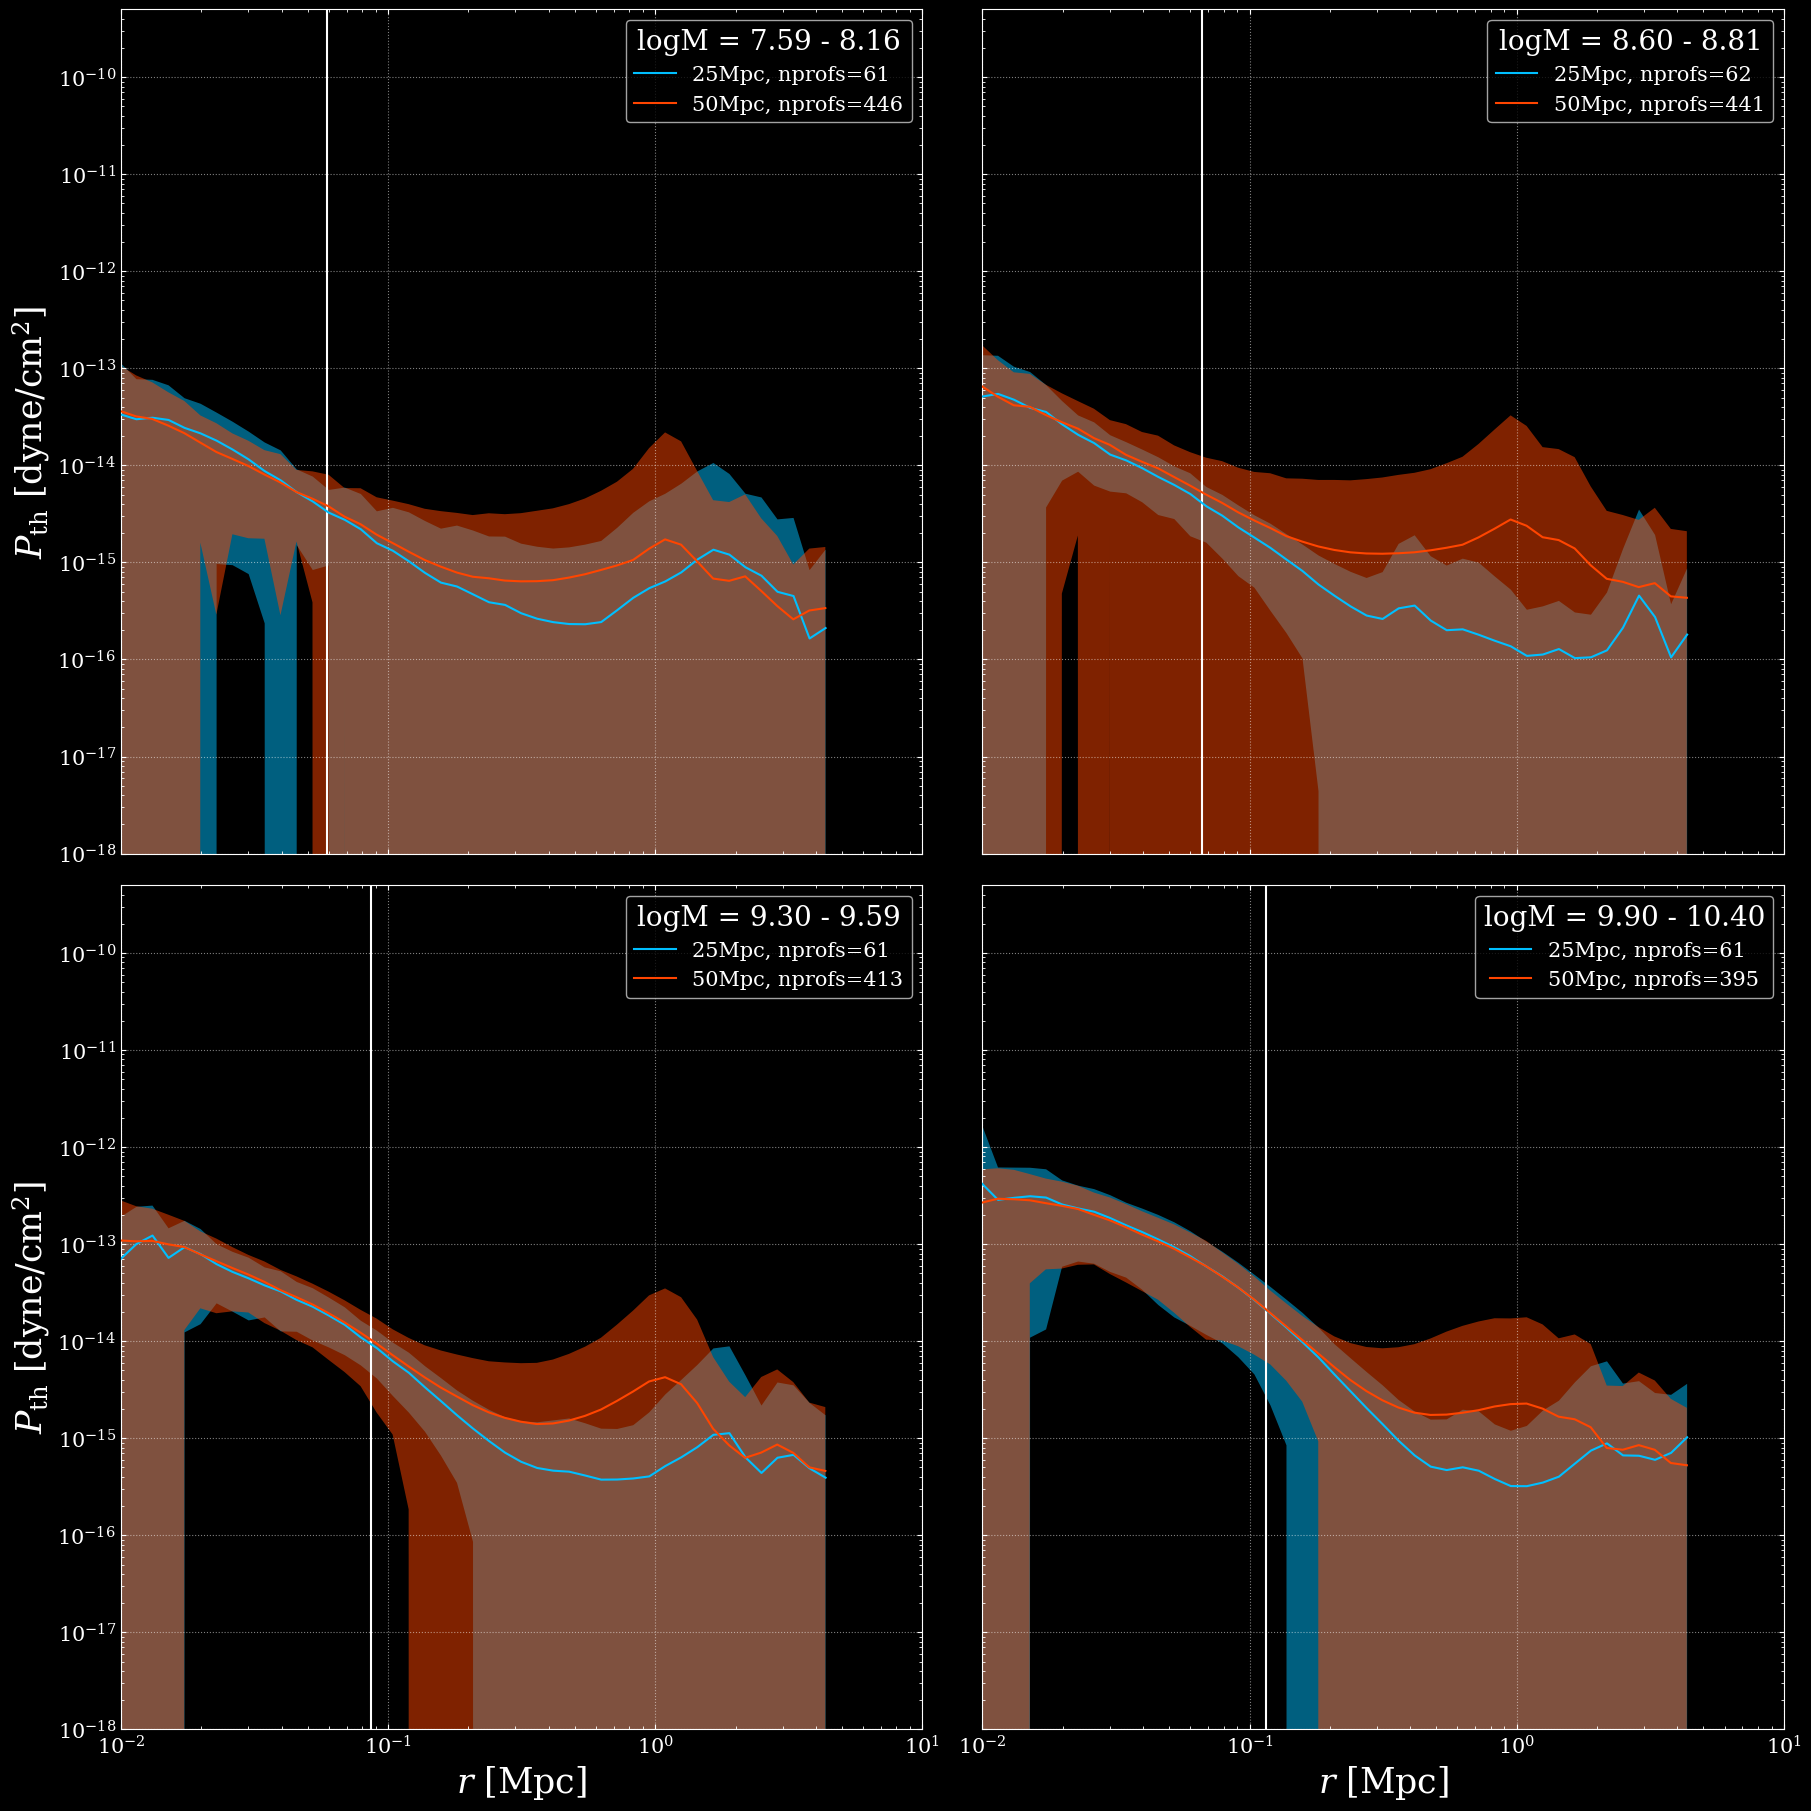

In [39]:
mlims = [np.percentile(np.log10(props25['GroupMassType'][:,4]*1e10/params50['HubbleParam']), q) for q in np.linspace(1, 100, 11)]

fig, axs  = plt.subplots(2, 2, figsize=(18, 18), layout='constrained', sharex=True, sharey=True)

for i in range(4):
    ax = axs.flatten()[i]
    if i in [2, 3]: ax.set(xlabel=r'$r$ [Mpc]')
    if i in [0, 2]: ax.set(ylabel=r'$P_\text{th}$ [dyne/cm$^2$]')

    i = [0, 3, 6, 8][i]

    mh_low, mh_high = 10**mlims[i], 10**mlims[i+1]
    cutprofs50, cutprops50 = profiles_expand_new.cut(profs50, props50, props50['GroupMassType'][:,4]*1e10/params50['HubbleParam'], profs50['r'], mh_low=mh_low, mh_high=mh_high)
    cutprofs25, cutprops25 = profiles_expand_new.cut(profs25, props25, props25['GroupMassType'][:,4]*1e10/params50['HubbleParam'], profs25['r'], mh_low=mh_low, mh_high=mh_high)
    ax.axvline(np.mean(cutprops50['Group_R_Crit500']))


    avepth25 = np.apply_along_axis(lambda v: np.mean(v[np.nonzero(v)]),0,cutprofs25['gaspth'])
    stdpth25 = np.apply_along_axis(lambda v: np.std(v[np.nonzero(v)]),0,cutprofs25['gaspth'])

    avepth50 = np.apply_along_axis(lambda v: np.mean(v[np.nonzero(v)]),0,cutprofs50['gaspth'])
    stdpth50 = np.apply_along_axis(lambda v: np.std(v[np.nonzero(v)]),0,cutprofs50['gaspth'])

    ax.loglog(cutprofs25['r'][0], avepth25*(u.Msun/u.Mpc/u.s**2).to(u.dyne/u.cm**2),label=f"25Mpc, nprofs={cutprofs25['r'].shape[0]}", c='deepskyblue', zorder=5)
    ax.fill_between(cutprofs25['r'][0], (avepth25+stdpth25)*(u.Msun/u.Mpc/u.s**2).to(u.dyne/u.cm**2), (avepth25-stdpth25)*(u.Msun/u.Mpc/u.s**2).to(u.dyne/u.cm**2),
                   alpha=0.5, color='deepskyblue', lw=0, zorder=0)

    ax.loglog(cutprofs50['r'][0], avepth50*(u.Msun/u.Mpc/u.s**2).to(u.dyne/u.cm**2),label=f"50Mpc, nprofs={cutprofs50['r'].shape[0]}", c='orangered', zorder=5)
    ax.fill_between(cutprofs50['r'][0], (avepth50+stdpth50)*(u.Msun/u.Mpc/u.s**2).to(u.dyne/u.cm**2), (avepth50-stdpth50)*(u.Msun/u.Mpc/u.s**2).to(u.dyne/u.cm**2),
                   alpha=0.5, color='orangered', lw=0, zorder=1)

    ax.set(xlim=(1e-2, 1e1), ylim=(1e-18, 5e-10))
    ax.legend(title=f"logM = {np.log10(mh_low):.2f} - {np.log10(mh_high):.2f}"); 

plt.show()

In [167]:
z, h = simparams['Redshift'], simparams['HubbleParam']

In [246]:
dists = []
for i in range(props50['GroupPos'].shape[0]):
    dist = np.sum((props50['GroupPos']-props50['GroupPos'][i, :])**2, axis=1)**0.5
    dists.append(dist)

dists = np.array(dists)
dists[dists==0]=np.inf

closelargem50 = [np.sum((dists[i,:]/1e3/(1+z)/h<5) & (props50['Group_M_Crit200']>10**12.75)) 
               for i in range(dists.shape[0])]

closex50 = np.sum(dists/1e3/(1+z)/h/props50['Group_R_Crit200']<10, axis=1)

dists = []
for i in range(props25['GroupPos'].shape[0]):
    dist = np.sum((props25['GroupPos']-props25['GroupPos'][i, :])**2, axis=1)**0.5
    dists.append(dist)

dists = np.array(dists)
dists[dists==0]=np.inf

closelargem25 = [np.sum((dists[i,:]/1e3/(1+z)/h<5) & (props25['Group_M_Crit200']>10**12.75)) 
               for i in range(dists.shape[0])]

closex25 = np.sum(dists/1e3/(1+z)/h/props25['Group_R_Crit200']<10, axis=1)

245 126 1448 1212
117 53 507 513


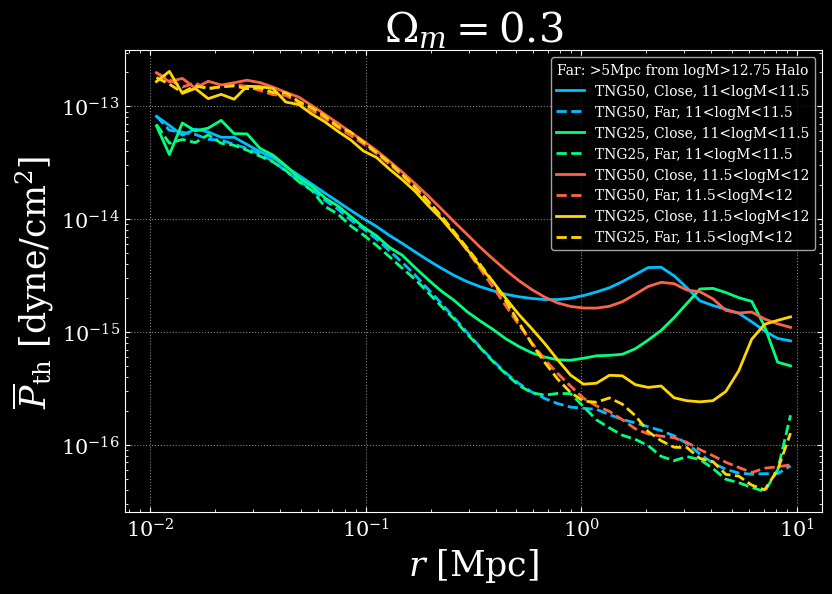

In [247]:
unitconv=(u.Msun/u.Mpc/u.s**2).to(u.dyne/u.cm**2)
clo50 = (np.array(closelargem50)>0) & (props50['Group_M_Crit200']<10**11.5) & (props50['Group_M_Crit200']>10**11)
far50 = (np.array(closelargem50)==0) & (props50['Group_M_Crit200']<10**11.5) & (props50['Group_M_Crit200']>10**11)
clo25 = (np.array(closelargem25)>0) & (props25['Group_M_Crit200']<10**11.5) & (props25['Group_M_Crit200']>10**11)
far25 = (np.array(closelargem25)==0) & (props25['Group_M_Crit200']<10**11.5) & (props25['Group_M_Crit200']>10**11)

print(np.sum(far25), np.sum(clo25), np.sum(far50), np.sum(clo50))

plt.loglog(profs50['r'][0], np.average(profs50['gaspth'][clo50], axis=0)*unitconv, label='TNG50, Close, 11<logM<11.5', lw=2, c='deepskyblue')
plt.loglog(profs50['r'][0], np.average(profs50['gaspth'][far50], axis=0)*unitconv, label='TNG50, Far, 11<logM<11.5', lw=2, c='deepskyblue', ls='--')
plt.loglog(profs25['r'][0], np.average(profs25['gaspth'][clo25], axis=0)*unitconv, label='TNG25, Close, 11<logM<11.5', lw=2, c='springgreen')
plt.loglog(profs25['r'][0], np.average(profs25['gaspth'][far25], axis=0)*unitconv, label='TNG25, Far, 11<logM<11.5', lw=2, ls='--', c='springgreen')

clo50 = (np.array(closelargem50)>0) & (props50['Group_M_Crit200']<10**12) & (props50['Group_M_Crit200']>10**11.5)
far50 = (np.array(closelargem50)==0) & (props50['Group_M_Crit200']<10**12) & (props50['Group_M_Crit200']>10**11.5)
clo25 = (np.array(closelargem25)>0) & (props25['Group_M_Crit200']<10**12) & (props25['Group_M_Crit200']>10**11.5)
far25 = (np.array(closelargem25)==0) & (props25['Group_M_Crit200']<10**12) & (props25['Group_M_Crit200']>10**11.5)

print(np.sum(far25), np.sum(clo25), np.sum(far50), np.sum(clo50))

plt.loglog(profs50['r'][0], np.average(profs50['gaspth'][clo50], axis=0)*unitconv, label='TNG50, Close, 11.5<logM<12', lw=2, c='tomato')
plt.loglog(profs50['r'][0], np.average(profs50['gaspth'][far50], axis=0)*unitconv, label='TNG50, Far, 11.5<logM<12', ls='--',lw=2, c='tomato')
plt.loglog(profs25['r'][0], np.average(profs25['gaspth'][clo25], axis=0)*unitconv, label='TNG25, Close, 11.5<logM<12', lw=2, c='gold')
plt.loglog(profs25['r'][0], np.average(profs25['gaspth'][far25], axis=0)*unitconv, label='TNG25, Far, 11.5<logM<12', ls='--', lw=2,c='gold')

plt.xlabel(r'$r$ [Mpc]'), plt.ylabel(r'$\overline{P}_\text{th}$ [dyne/cm$^2$]'), plt.title(r'$\Omega_m=0.3$')

plt.legend(title='Far: >5Mpc from logM>12.75 Halo',fontsize=10, title_fontsize=10)
plt.show()

91 280 639 2021
37 133 166 854


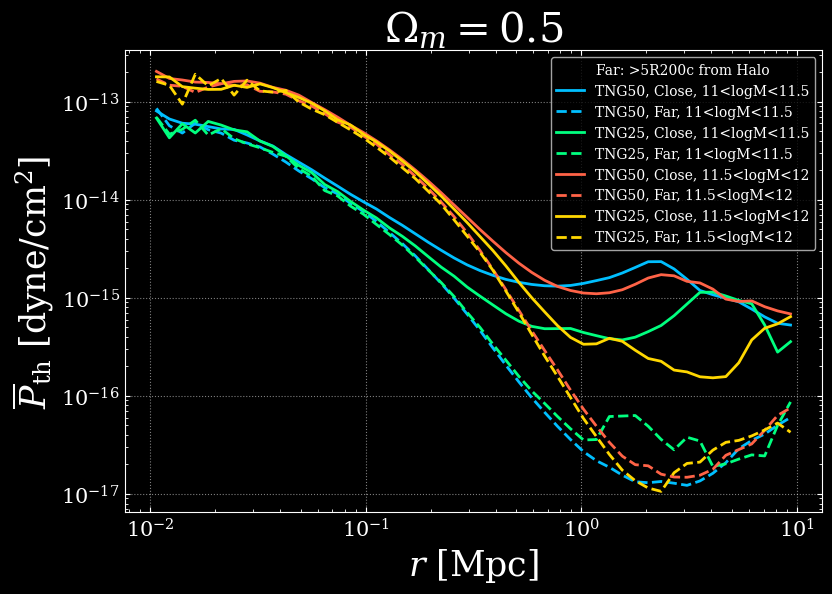

In [248]:
clo50 = (np.array(closex50)>0) & (props50['Group_M_Crit200']<10**11.5) & (props50['Group_M_Crit200']>10**11)
far50 = (np.array(closex50)==0) & (props50['Group_M_Crit200']<10**11.5) & (props50['Group_M_Crit200']>10**11)
clo25 = (np.array(closex25)>0) & (props25['Group_M_Crit200']<10**11.5) & (props25['Group_M_Crit200']>10**11)
far25 = (np.array(closex25)==0) & (props25['Group_M_Crit200']<10**11.5) & (props25['Group_M_Crit200']>10**11)

print(np.sum(far25), np.sum(clo25), np.sum(far50), np.sum(clo50))


plt.loglog(profs50['r'][0], np.average(profs50['gaspth'][clo50], axis=0)*unitconv, label='TNG50, Close, 11<logM<11.5', lw=2, c='deepskyblue')
plt.loglog(profs50['r'][0], np.average(profs50['gaspth'][far50], axis=0)*unitconv, label='TNG50, Far, 11<logM<11.5', lw=2, c='deepskyblue', ls='--')
plt.loglog(profs25['r'][0], np.average(profs25['gaspth'][clo25], axis=0)*unitconv, label='TNG25, Close, 11<logM<11.5', lw=2, c='springgreen')
plt.loglog(profs25['r'][0], np.average(profs25['gaspth'][far25], axis=0)*unitconv, label='TNG25, Far, 11<logM<11.5', lw=2, ls='--', c='springgreen')

clo50 = (np.array(closex50)>0) & (props50['Group_M_Crit200']<10**12) & (props50['Group_M_Crit200']>10**11.5)
far50 = (np.array(closex50)==0) & (props50['Group_M_Crit200']<10**12) & (props50['Group_M_Crit200']>10**11.5)
clo25 = (np.array(closex25)>0) & (props25['Group_M_Crit200']<10**12) & (props25['Group_M_Crit200']>10**11.5)
far25 = (np.array(closex25)==0) & (props25['Group_M_Crit200']<10**12) & (props25['Group_M_Crit200']>10**11.5)

print(np.sum(far25), np.sum(clo25), np.sum(far50), np.sum(clo50))


plt.loglog(profs50['r'][0], np.average(profs50['gaspth'][clo50], axis=0)*unitconv, label='TNG50, Close, 11.5<logM<12', lw=2, c='tomato')
plt.loglog(profs50['r'][0], np.average(profs50['gaspth'][far50], axis=0)*unitconv, label='TNG50, Far, 11.5<logM<12', ls='--',lw=2, c='tomato')
plt.loglog(profs25['r'][0], np.average(profs25['gaspth'][clo25], axis=0)*unitconv, label='TNG25, Close, 11.5<logM<12', lw=2, c='gold')
plt.loglog(profs25['r'][0], np.average(profs25['gaspth'][far25], axis=0)*unitconv, label='TNG25, Far, 11.5<logM<12', ls='--', lw=2,c='gold')


plt.xlabel(r'$r$ [Mpc]'), plt.ylabel(r'$\overline{P}_\text{th}$ [dyne/cm$^2$]'), plt.title(r'$\Omega_m=0.5$')

plt.legend(title='Far: >5R200c from Halo',fontsize=10, title_fontsize=10)
plt.show()

In [16]:
h, z, Omegam, OmegaL, Omegab = params50['HubbleParam'], params50['Redshift'], params50['Omega0'], params50['OmegaLambda'], params50['OmegaBaryon']
rhocrit = (3/(8*np.pi*c.G)) * ((100*h*u.km/u.s/u.Mpc)**2*(OmegaM*(1+z)**3+OmegaL))
p200_some = (c.G*u.Msun*200*rhocrit/(2*u.Mpc)).to(u.Msun/u.Mpc/u.s**2).value


P00 = lambda mh, z: 18.1 * (mh/10**14)**0.154 * (1+z)**-0.758
xc0 = lambda mh, z: 0.497 * (mh/10**14)**-0.00865 * (1+z)**0.731
beta0 = lambda mh, z: 4.35 * (mh/10**14)**0.0393 * (1+z)**0.415


def func(x, P0, xc, beta):
    gamma, alpha=-0.3, 1
    return Omegab/Omegam * p200_some*(mh/rh) * P0 * (x/xc)**gamma * (1+(x/xc)**alpha)**-beta

12.294545401215005 194


/tmp/ipykernel_114/1682384780.py:7: RuntimeWarning: invalid value encountered in divide
  poi = np.sqrt(np.apply_along_axis(lambda v: np.sum(v[~np.isnan(v)]), 0, (profscut['gaspth'])**2/profscut['npart'])/profscut['npart'].shape[0])


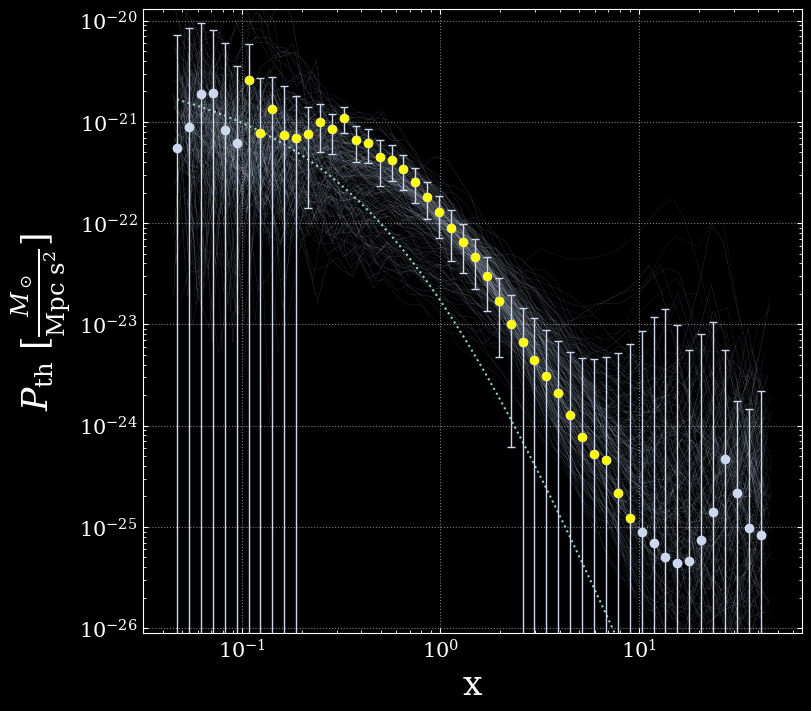

In [63]:
j=13
profscut, propscut = profiles_expand_new.cut(profs50, props50, props50['Group_M_Crit200'], profs50['r'], mh_low = 0.7*props50['Group_M_Crit200'][j], mh_high = 1.2*props50['Group_M_Crit200'][j])

print(np.log10(props50['Group_M_Crit200'][j]), profscut['r'].shape[0])

std = np.apply_along_axis(lambda v: np.std(v[np.nonzero(v)]), 0, profscut['gaspth'])
poi = np.sqrt(np.apply_along_axis(lambda v: np.sum(v[~np.isnan(v)]), 0, (profscut['gaspth'])**2/profscut['npart'])/profscut['npart'].shape[0])
err = np.sqrt(poi**2+std**2)

fig, ax = plt.subplots(1,1, figsize=(8, 7), layout='constrained')
ax.set(xscale='log', yscale='log', ylim=(0.2*np.min(profscut['gaspth'][j]), 5*np.max(profscut['gaspth'][j])),
      xlabel=r'x', ylabel=r'$P_\text{th} \ [\frac{M_\odot}{\text{Mpc s}^2}]$')

ax.errorbar(profscut['r'][j][profscut['npart'][j]!=0]/propscut['Group_R_Crit200'][j], profscut['gaspth'][j][profscut['npart'][j]!=0], yerr=err[profscut['npart'][j]!=0],
           c = cmap(lognorm(propscut['Group_M_Crit200'][j])), zorder=propscut['Group_M_Crit200'][j], lw = 20*norm(propscut['Group_M_Crit200'][j]),
           capsize=3, elinewidth=1, marker='o', ls='')
for i in range(propscut['Group_R_Crit200'].size):
    ax.plot(profscut['r'][i][profscut['npart'][i]!=0]/propscut['Group_R_Crit200'][i], profscut['gaspth'][i][profscut['npart'][i]!=0],
           c = cmap(lognorm(propscut['Group_M_Crit200'][i])), zorder=propscut['Group_M_Crit200'][i], lw = norm(propscut['Group_M_Crit200'][i]))


mh, rh = propscut['Group_M_Crit200'][j], propscut['Group_R_Crit200'][j]
ax.plot(profscut['r'][j]/rh, func(profscut['r'][j]/rh, P00(mh, z), xc0(mh, z), beta0(mh, z)), ls=':', label='Guess GNFW')

profs_fit, props_fit = profiles_expand_new.cut(profscut, propscut, propscut['Group_M_Crit200'], profscut['r'], inner_cut=1e-1*rh, outer_cut=1e1*rh)
ax.scatter(profs_fit['r'][j][profs_fit['npart'][j]!=0]/rh, profs_fit['gaspth'][j][profs_fit['npart'][j]!=0], zorder=1e20, s=30, c='yellow')

plt.show()

/tmp/ipykernel_114/1849680403.py:2: RuntimeWarning: invalid value encountered in divide
  poi_fit = np.sqrt(np.apply_along_axis(lambda v: np.sum(v[~np.isnan(v)]), 0, (profs_fit['gaspth'])**2/profs_fit['npart'])/profs_fit['npart'].shape[0])


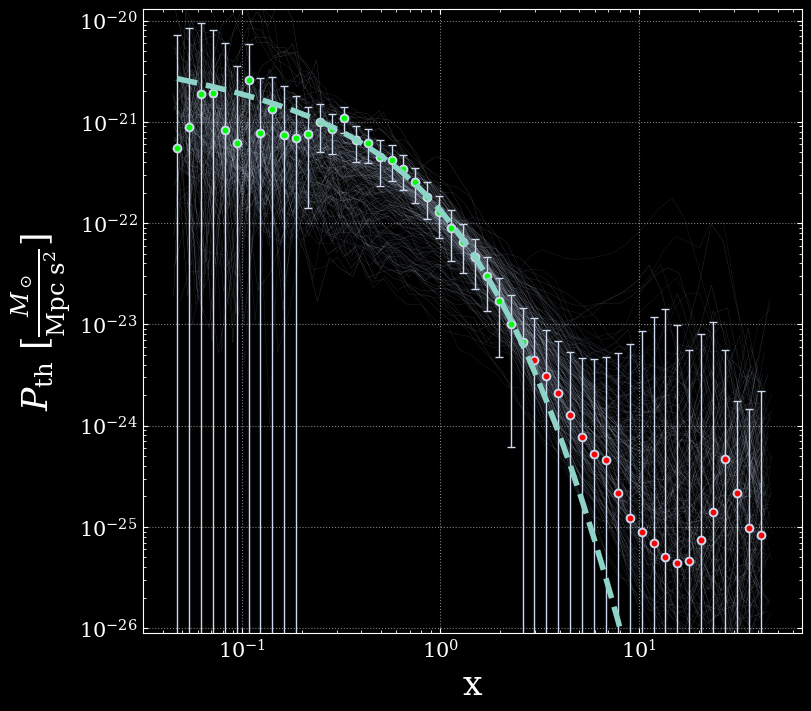

In [56]:
std_fit = np.apply_along_axis(lambda v: np.std(v[np.nonzero(v)]), 0, profs_fit['gaspth'])
poi_fit = np.sqrt(np.apply_along_axis(lambda v: np.sum(v[~np.isnan(v)]), 0, (profs_fit['gaspth'])**2/profs_fit['npart'])/profs_fit['npart'].shape[0])
err_fit = np.sqrt(poi_fit**2+std_fit**2)

popt, pcov = scipy.optimize.curve_fit(func, xdata=profs_fit['r'][j]/rh, ydata=profs_fit['gaspth'][j], 
                          sigma=err_fit, p0=[P00(mh, z), xc0(mh, z), beta0(mh, z)])
mse = ((func(profscut['r'][j]/rh, *popt)-profscut['gaspth'][j])/profscut['gaspth'][j]/err)**2

fig, ax = plt.subplots(1,1, figsize=(8, 7), layout='constrained')
ax.set(xscale='log', yscale='log',ylim=(0.2*np.min(profscut['gaspth'][j]), 5*np.max(profscut['gaspth'][j])),
      xlabel=r'x', ylabel=r'$P_\text{th} \ [\frac{M_\odot}{\text{Mpc s}^2}]$')

ax.errorbar(profscut['r'][j][profscut['npart'][j]!=0]/propscut['Group_R_Crit200'][j], profscut['gaspth'][j][profscut['npart'][j]!=0], yerr=err[profscut['npart'][j]!=0],
           c = cmap(lognorm(propscut['Group_M_Crit200'][j])), zorder=propscut['Group_M_Crit200'][j], lw = 20*norm(propscut['Group_M_Crit200'][j]),
           capsize=3, elinewidth=1, marker='o', ls='')
for i in range(propscut['Group_R_Crit200'].size):
    ax.plot(profscut['r'][i][profscut['npart'][i]!=0]/propscut['Group_R_Crit200'][i], profscut['gaspth'][i][profscut['npart'][i]!=0],
           c = cmap(lognorm(propscut['Group_M_Crit200'][i])), zorder=propscut['Group_M_Crit200'][i], lw = norm(propscut['Group_M_Crit200'][i]))


mh, rh = propscut['Group_M_Crit200'][j], propscut['Group_R_Crit200'][j]
ax.plot(profscut['r'][j]/rh, func(profscut['r'][j]/rh, *popt), ls='--', label='Fit GNFW', lw=4, zorder=1e21)

profs_fit, props_fit = profiles_expand_new.cut(profscut, propscut, propscut['Group_M_Crit200'], profscut['r'], inner_cut=1e-1*rh, outer_cut=1e1*rh)
ax.scatter(profscut['r'][j][mse<1e45]/rh, profscut['gaspth'][j][mse<1e45], zorder=1e20, s=10, c='lime')
ax.scatter(profscut['r'][j][mse>1e45]/rh, profscut['gaspth'][j][mse>1e45], zorder=1e20, s=10, c='r')

plt.show()

In [49]:
old_profiles, old_haloprops, old_simparams = profiles_expand_new.extract_old("/home/jovyan/PUBLIC_RELEASE/", "IllustrisTNG", subset, 5, snap)
old_haloprops, old_profiles = profiles_expand_new.convert(old_haloprops, old_simparams['Redshift'], old_simparams['HubbleParam'], profs=old_profiles)

Text(0.5, 1.0, 'IllustrisTNG 1P 1_0 z=4')

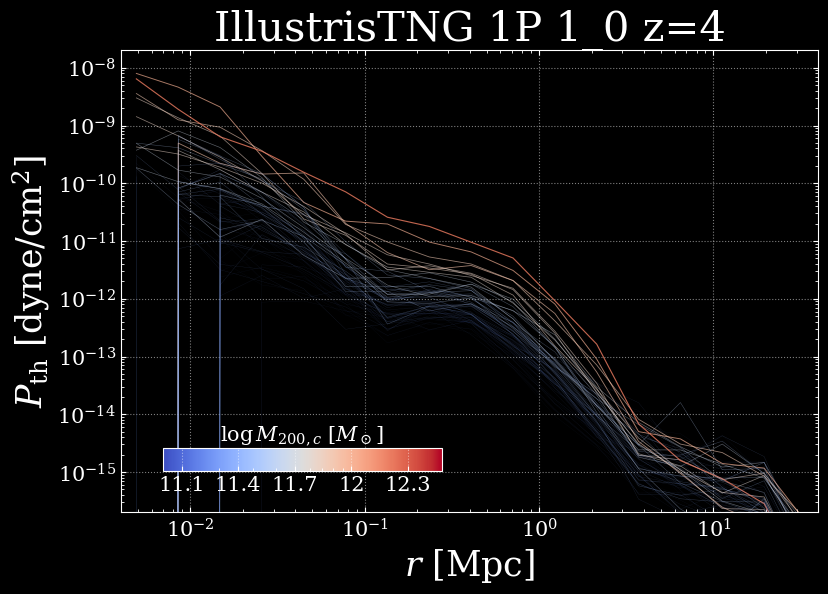

In [114]:
fig, (ax)  = plt.subplots(1, 1)

for i in range(old_profiles['npart'].shape[0]):
    ax.loglog(old_profiles['r'][i], old_profiles['pres'][i]*(u.Msun/u.Mpc/u.s**2).to(u.dyne/u.cm**2), 
                   c= cmap(norm(old_haloprops['Group_M_Crit200'][i])), 
                   alpha=np.max( [0, np.min([1, norm(old_haloprops['Group_M_Crit200'][i])]) ] ),
                   lw= norm(old_haloprops['Group_M_Crit200'][i]))

cax = inset_axes(ax, width="40%", height="5%", loc="lower left", borderpad=2)
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax, orientation='horizontal',
                   ticks=[10**11.1, 10**11.4, 10**11.7, 10**12, 10**12.3])
cbar.ax.set_xticklabels(['11.1', '11.4', '11.7', '12', '12.3'])
cax.set_title(r'$\log M_{200, c} \ [M_\odot] $', fontsize=15)

ax.set_xlabel(r'$r$ [Mpc]'); ax.set_ylabel(r'$P_\text{th}$ [dyne/cm$^2$]')
ax.set_xlim(4e-3, 4e1), ax.set_ylim(2e-16, 2e-8)
ax.set_title('IllustrisTNG 1P 1_0 z=4')

# Good stuff

In [2]:
basepath = "/home/jovyan/PUBLIC_RELEASE"
suite = 'IllustrisTNG'
subset = 'LH'
sim = '101'
snap = 24

In [3]:
halopath = f"{basepath}/Sims/{suite}/{subset}/{subset}_{sim}/"
haloparams = dict(h5py.File(f"{halopath}/groups_{snap:03}.hdf5", 'r')['Parameters'].attrs)

In [5]:
haloparams['Redshift']

KeyError: 'Redshift'

In [ ]:
profiles_expand_new.stack(basepath, suite, subset, sim, snap, profs, lims, bins, mhlims, mass_kind)

In [3]:
old_profiles, old_haloprops, old_simparams = profiles_expand_new.extract_old(basepath, suite, subset, sim, snap)
old_haloprops, old_profiles = profiles_expand_new.convert(old_haloprops, old_simparams['Redshift'], old_simparams['HubbleParam'], profs=old_profiles)

# [(key, old_simparams[key][()]) for key in old_simparams.keys()]
# [(key, old_haloprops[key].shape) for key in old_haloprops.keys()]
[(key, old_profiles[key].shape) for key in old_profiles.keys()]

[('r', (30, 25)),
 ('npart', (30, 25)),
 ('dens', (30, 25)),
 ('pres', (30, 25)),
 ('metal_gmw', (30, 25)),
 ('temp_gmw', (30, 25))]

In [4]:
newfile = h5py.File(f"/home/jovyan/home/Profiles/{suite}/{subset}/{suite}_{subset}_{sim}_{snap}.hdf5", 'r')
extract = lambda group: {key: group[key][()] for key in group.keys()}
params, profs, props = extract(newfile['Parameters']), extract(newfile['Profiles']), extract(newfile['Groups'])
newfile.close()

props, profs = profiles_expand_new.convert(props, params['Redshift'], params['HubbleParam'], profs=profs)

# [(key, params[key][()]) for key in params.keys()]
# [(key, props[key].shape) for key in props.keys()]
[(key, profs[key].shape) for key in profs.keys()]

[('r', (56, 50)),
 ('npart', (56, 50)),
 ('gasdens', (56, 50)),
 ('gaspth', (56, 50))]

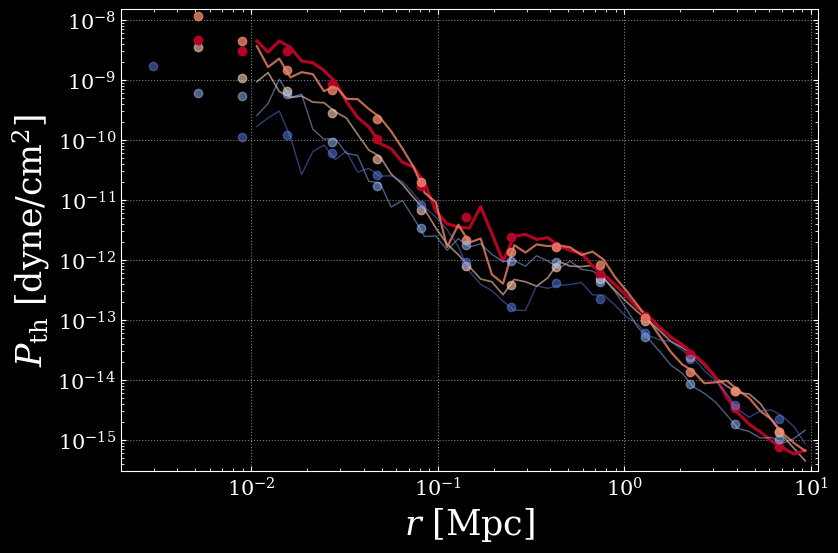

In [5]:
cmap, norm = plt.get_cmap('coolwarm'), mpl.colors.LogNorm(vmin=3e11, vmax=5e11)

for i in range(profs['npart'].shape[0]):
    if props['Group_M_Crit200'][i]>3e11:
        plt.loglog(profs['r'][i], profs['gaspth'][i]*(u.Msun/u.Mpc/u.s**2).to(u.dyne/u.cm**2), 
                   c= cmap(norm(props['Group_M_Crit200'][i])), 
                   alpha=np.max( [0.5, np.min([1, norm(props['Group_M_Crit200'][i])]) ] ), 
                   lw= np.max([1, 2*norm(props['Group_M_Crit200'][i])]))

for i in range(old_profiles['npart'].shape[0]):
    if old_haloprops['Group_M_Crit200'][i]>3e11:
        plt.loglog(old_profiles['r'][i], old_profiles['pres'][i]*(u.Msun/u.Mpc/u.s**2).to(u.dyne/u.cm**2), 
                   c= cmap(norm(old_haloprops['Group_M_Crit200'][i])), 
                   alpha=np.max( [0.5, np.min([1, norm(old_haloprops['Group_M_Crit200'][i])]) ] ),
                   lw=0, marker='o')

plt.xlabel(r'$r$ [Mpc]'); plt.ylabel(r'$P_\text{th}$ [dyne/cm$^2$]')
plt.xlim(2e-3, 11); plt.ylim(3e-16, 1.5e-8);

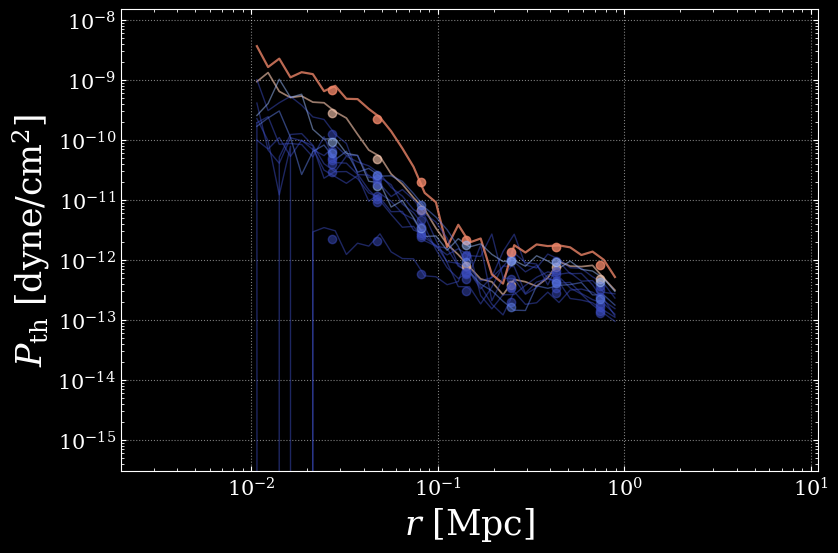

In [6]:
cutprofs, cutprops = profiles_expand_new.cut(profs, props, props['Group_M_Crit200'], profs['r'],
                                            mh_low=2e11, mh_high=5e11,outer_cut=1)

cutoldprofs, cutoldprops = profiles_expand_new.cut(old_profiles, old_haloprops, old_haloprops['Group_M_Crit200'], old_profiles['r'],
                                            mh_low=2e11, mh_high=5e11,inner_cut=2e-2,outer_cut=1)


for i in range(cutprofs['npart'].shape[0]):
    plt.loglog(cutprofs['r'][i], cutprofs['gaspth'][i]*(u.Msun/u.Mpc/u.s**2).to(u.dyne/u.cm**2), 
                   c= cmap(norm(cutprops['Group_M_Crit200'][i])), 
                   alpha=np.max( [0.5, np.min([1, norm(cutprops['Group_M_Crit200'][i])]) ] ), 
                   lw= np.max([1, 2*norm(cutprops['Group_M_Crit200'][i])]))

for i in range(cutoldprofs['npart'].shape[0]):
    plt.loglog(cutoldprofs['r'][i], cutoldprofs['pres'][i]*(u.Msun/u.Mpc/u.s**2).to(u.dyne/u.cm**2), 
                   c= cmap(norm(cutoldprops['Group_M_Crit200'][i])), 
                   alpha=np.max( [0.5, np.min([1, norm(cutoldprops['Group_M_Crit200'][i])]) ] ),
                   lw=0, marker='o')

plt.xlabel(r'$r$ [Mpc]'); plt.ylabel(r'$P_\text{th}$ [dyne/cm$^2$]')
plt.xlim(2e-3, 11); plt.ylim(3e-16, 1.5e-8);

In [37]:
def weight(profs, props, weightby, distribution):
    props, profs = profiles_expand_new.convert(props, params['Redshift'], params['HubbleParam'], profs)
    values = {}
    for prof in profs.key():
        values[prof]={
                'mean': np.apply_along_axis(lambda v: np.mean(v[np.nonzero(v)]), 0, profs[prof]),
                'std': np.apply_along_axis(lambda v: np.std(v[np.nonzero(v)]), 0, profs[prof]),
                'median': np.apply_along_axis(lambda v: np.median(v[np.nonzero(v)]), 0, profs[prof]),
                'P84': np.apply_along_axis(lambda v: np.percentile(v[np.nonzero(v)], 84), 0, profs[prof]),
                'P16': np.apply_along_axis(lambda v: np.percentile(v[np.nonzero(v)], 16), 0, profs[prof]),
                }

    
    return values

In [ ]:
weight

In [8]:
cutprofs, cutprops = profiles_expand_new.cut(profs, props, props['Group_M_Crit200'], profs['r'])

In [35]:
np.apply_along_axis(lambda v: np.std(np.log10(v[np.nonzero(v)])), 0, cutprofs['gaspth'])

array([0.49182845, 0.49143658, 0.550985  , 0.61571982, 0.57051333,
       0.64930871, 0.60941703, 0.62610148, 0.61900769, 0.51892729,
       0.53026247, 0.47339162, 0.41789176, 0.44300205, 0.40020671,
       0.37892804, 0.34066092, 0.31325572, 0.34749025, 0.32167746,
       0.37613181, 0.36841239, 0.30539912, 0.33672503, 0.24997965,
       0.24493611, 0.22653902, 0.25146883, 0.27147366, 0.28099637,
       0.3230609 , 0.31642708, 0.3066128 , 0.29875357, 0.30346358,
       0.29240459, 0.2807549 , 0.26206064, 0.25282221, 0.24425749,
       0.2387438 , 0.25891675, 0.30432941, 0.32934754, 0.31732874,
       0.27762417, 0.27371045, 0.29511659, 0.27484302, 0.23420832])

In [36]:
np.apply_along_axis(lambda v: np.std(v[np.nonzero(v)]), 0, cutprofs['gaspth'])

array([1.46634249e-18, 8.44110300e-19, 1.19158721e-18, 8.74332837e-19,
       5.69827851e-19, 4.89320436e-19, 3.34372960e-19, 2.56101798e-19,
       1.38402339e-19, 1.10122235e-19, 7.50090759e-20, 5.13565653e-20,
       3.13063148e-20, 1.71724165e-20, 1.01540353e-20, 4.80314760e-21,
       2.41609639e-21, 1.11683553e-21, 1.18631390e-21, 8.78322671e-22,
       1.67472751e-21, 8.37614656e-22, 4.89727903e-22, 7.99137991e-22,
       5.80596504e-22, 5.59067990e-22, 5.58780220e-22, 4.94222868e-22,
       4.46926412e-22, 3.78273554e-22, 3.55685523e-22, 2.53190107e-22,
       1.46448274e-22, 9.10416466e-23, 5.79192542e-23, 3.76520738e-23,
       2.47072189e-23, 1.63780839e-23, 1.21865269e-23, 8.52612628e-24,
       5.76875138e-24, 4.70828473e-24, 6.29567514e-24, 4.42846341e-24,
       2.97128368e-24, 1.75494790e-24, 1.42508169e-24, 1.22062262e-24,
       9.22719348e-25, 6.52096916e-25])

In [28]:
std_arr=[]
for i in range(cutprofs['gaspth'].shape[1]):
    std_arr.append(np.std(np.apply_along_axis(lambda v: np.log10(v[np.nonzero(v)]),0,cutprofs['gaspth'][:,i])))
std=np.array(std_arr,dtype='float')

In [29]:
std

array([0.49182845, 0.49143658, 0.550985  , 0.61571982, 0.57051333,
       0.64930871, 0.60941703, 0.62610148, 0.61900769, 0.51892729,
       0.53026247, 0.47339162, 0.41789176, 0.44300205, 0.40020671,
       0.37892804, 0.34066092, 0.31325572, 0.34749025, 0.32167746,
       0.37613181, 0.36841239, 0.30539912, 0.33672503, 0.24997965,
       0.24493611, 0.22653902, 0.25146883, 0.27147366, 0.28099637,
       0.3230609 , 0.31642708, 0.3066128 , 0.29875357, 0.30346358,
       0.29240459, 0.2807549 , 0.26206064, 0.25282221, 0.24425749,
       0.2387438 , 0.25891675, 0.30432941, 0.32934754, 0.31732874,
       0.27762417, 0.27371045, 0.29511659, 0.27484302, 0.23420832])

In [66]:
suite = 'IllustrisTNG'
subset = '1P'
sim = 'p1_0'
snap = zdf.loc[np.abs(zdf.Redshift-0.55).idxmin(), '91 snapshots']

profs = ['gasdens', 'gaspth'] 

lims = [0.01, 10]  # profile limits in Mpc
bins = 50  # number of bins
mhlims = [10**11.0, 10**15.0]  # Halo mass in Msun
mass_kind = 'halo'  # Use halo mass M200c or stellar mass for cuts

In [104]:
[f"{sim}" for sim in np.arange(10)]

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [ ]:
basepath = f"/home/jovyan/Data/Sims/{suite}/{subset}/{subset}_{sim}/"
dict(h5py.File(f"{basepath}/snapshot_{snap:03}.hdf5", 'r')['Header'].attrs)
dict(h5py.File(f"{basepath}/groups_{snap:03}.hdf5", 'r')['Parameters'].attrs)

In [100]:
dict(h5py.File(f"{basepath}/groups_{snap:03}.hdf5", 'r')['Parameters'].attrs)

{'AGB_MassTransferOn': 1,
 'ActivePartFracForNewDomainDecomp': 0.01,
 'AdaptiveHydroSofteningSpacing': 1.2,
 'BlackHoleAccretionFactor': 1.0,
 'BlackHoleCenteringMassMultiplier': 1000.0,
 'BlackHoleEddingtonFactor': 1.0,
 'BlackHoleFeedbackFactor': 0.1,
 'BlackHoleMaxAccretionRadius': 1e+20,
 'BlackHoleRadiativeEfficiency': 0.2,
 'BoxSize': 25000.0,
 'CellMaxAngleFactor': 2.25,
 'CellShapingSpeed': 0.5,
 'ComovingIntegrationOn': 1,
 'CoolingOn': 1,
 'CoolingTablePath': b'./GFM_Tables/Cooling/cooling_metal_AGN_Compton_self_shielding_Rahmati12.hdf5',
 'CourantFac': 0.3,
 'CpuTimeBetRestartFile': 3600.0,
 'CritOverDensity': 57.7,
 'CritPhysDensity': 0.0,
 'DerefinementCriterion': 1,
 'DesLinkNgb': 20,
 'DesNumNgb': 64,
 'DesNumNgbBlackHole': 128,
 'DesNumNgbEnrichment': 64,
 'ErrTolForceAcc': 0.0025,
 'ErrTolIntAccuracy': 0.012,
 'ErrTolTheta': 0.7,
 'ErrTolThetaSubfind': 0.7,
 'FactorEVP': 573.0,
 'FactorForSofterEQS': 0.3,
 'GasSoftFactor': 2.5,
 'GravityConstantInternal': 0.0,
 'Hubble

In [68]:
r, n, val, phaloprops, simparams = profiles_expand_new.stack(suite, subset, sim, snap, profs, lims, bins, mhlims, mass_kind)

Fetching particle quantities from sims
Computing values
('rh max', 822.1579)
('search radius', 5.309879160718952)
('rbuff', 4365.559089141056)
(-1, -1, -1)
(-1, -1, 0)
(-1, -1, 1)
(-1, 0, -1)
(-1, 0, 0)
(-1, 0, 1)
(-1, 1, -1)
(-1, 1, 0)
(-1, 1, 1)
(0, -1, -1)
(0, -1, 0)
(0, -1, 1)
(0, 0, -1)
(0, 0, 1)
(0, 1, -1)
(0, 1, 0)
(0, 1, 1)
(1, -1, -1)
(1, -1, 0)
(1, -1, 1)
(1, 0, -1)
(1, 0, 0)
(1, 0, 1)
(1, 1, -1)
(1, 1, 0)
(1, 1, 1)
Finished adding ghost particles for periodic boundary conditions
1 of 27 done, nhalos = 7
2 of 27 done, nhalos = 20
3 of 27 done, nhalos = 26
4 of 27 done, nhalos = 36
5 of 27 done, nhalos = 11
6 of 27 done, nhalos = 32
7 of 27 done, nhalos = 20
8 of 27 done, nhalos = 3
9 of 27 done, nhalos = 20
10 of 27 done, nhalos = 18
11 of 27 done, nhalos = 27
12 of 27 done, nhalos = 13
13 of 27 done, nhalos = 59
14 of 27 done, nhalos = 16
15 of 27 done, nhalos = 14
16 of 27 done, nhalos = 29
17 of 27 done, nhalos = 22
18 of 27 done, nhalos = 17
19 of 27 done, nhalos = 15
20 

In [120]:
np.reshape(val[1], (n.shape[0], bins)).shape

(627, 50)

In [113]:
n.shape[0]

627

In [110]:
n.shape

(627, 50)

In [108]:
val[1].shape

(627, 50)

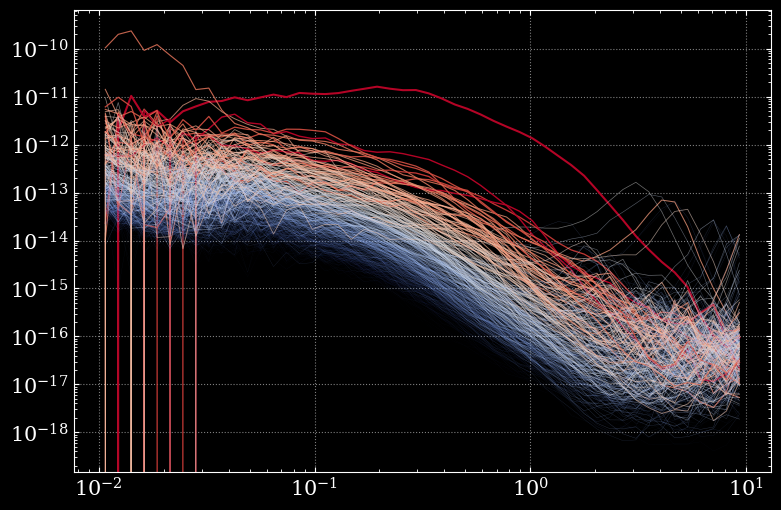

In [75]:
z, h = simparams['Redshift'], simparams['HubbleParam']
testmhs = phaloprops['Group_M_Crit200']*1e10/h
cmap, norm = plt.get_cmap('coolwarm'), mpl.colors.LogNorm(vmin=1e11, vmax=1e13)
for i in range(n.shape[0]):
    plt.loglog(r/1e3*(1+z)/h, 
               val[1][i]*1e10*(u.km**2/u.kpc**3).to(1/u.Mpc)*(1+z)**3*h**2*(u.Msun/u.Mpc/u.s**2).to(u.dyne/u.cm**2), 
               c= cmap(norm(testmhs[i])), 
               alpha=np.min([1, norm(testmhs[i])], axis=0),
                lw=norm(testmhs[i]))

In [78]:
file_hdf5=h5py.File(f"/home/jovyan/home/illstack_CAMELS/{suite}_{subset}_{sim}_{snap}_TEST.hdf5", 'w')

file_hdf5.create_group('Parameters')
for p in simparams.keys():
    file_hdf5.create_dataset(f'Parameters/{p}', data=simparams[p])

file_hdf5.create_group('Profiles', track_order=True)
file_hdf5.create_dataset('Profiles/r', data=r, track_order=True, dtype='float64')
file_hdf5.create_dataset('Profiles/nparticles', data=n.astype(np.float64), track_order=True, dtype='float64')
for i in range(len(profs)):
    file_hdf5.create_dataset(f"Profiles/{profs[i]}",data=val.astype(np.float64)[i], track_order=True, dtype='float64')

# Add all halo properties
file_hdf5.create_group('Properties', track_order=True)
for prop in phaloprops.keys():
    file_hdf5.create_dataset(f'Properties/{prop}', data=phaloprops[prop], track_order=True, dtype='float64')

file_hdf5.close()